In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi'] = 150 # dots per inch

In [2]:
photondata3 = np.loadtxt("29_full_lower_range.txt", delimiter=",")
photondata2 = np.loadtxt("PHOTONS_lower_range_282.txt")
photondata1 = np.loadtxt("PHOTONS_lower_range.txt")

In [3]:
binnum=photondata1.shape[0]

myy = photondata1.T[0]
occurances = photondata1.T[1]

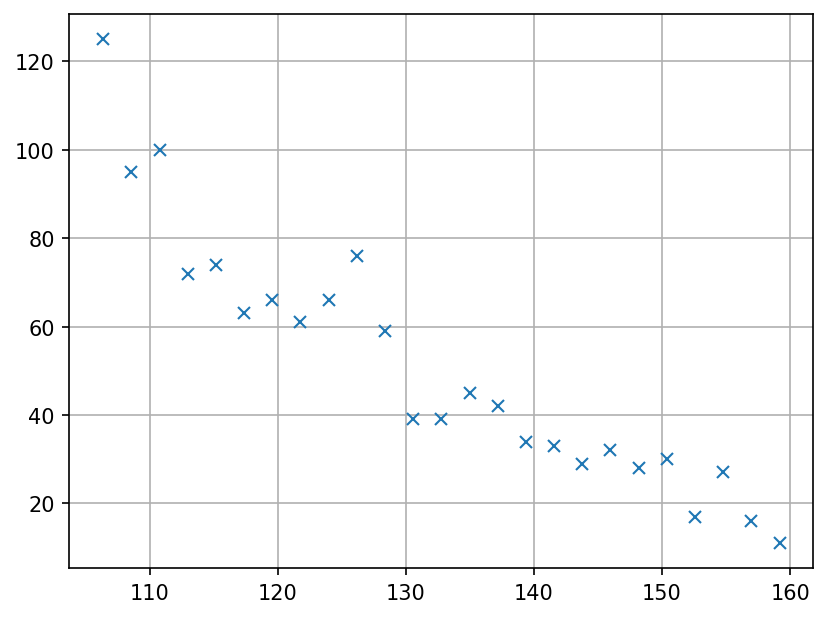

In [4]:
# Sort into smaller number of bins, eg for num = 4, we will have 25 bins
num = 4
x_data = myy
y_data = occurances
width = x_data[num] - x_data[0]
new_bins_centres = []
new_bin_entries = []


for k in range(0, 100, num):
    new_bin_centre = x_data[k] + width/2
    new_bins_centres.append(new_bin_centre)
    new_bin_entry = 0
    for i in range(num):
        new_bin_entry = new_bin_entry + y_data[k+i]
    new_bin_entries.append(new_bin_entry)    

myy = new_bins_centres
occurances = new_bin_entries

myy2 = [x_data[i] + width/2 for i in range(0, 100, num)]
occurances2 = [sum(y_data[i:i+num]) for i in range(0, 100, num)]


plt.figure()
plt.plot(myy, occurances, "x")
plt.grid()

In [5]:
# 115GeV - 135GeV region is ecluded for fitting polynomial, as we are looking for a peak around 125GeV
myy = np.array(myy)
occurances = np.array(occurances)
exclude_condition = (myy >= 115) & (myy <= 135)

myy_clear = myy[~exclude_condition]
occurances_clear = occurances[~exclude_condition]

In [6]:
def polynomial_fit(x, fit_params):
    value = 0
    k = fit_params.shape[0]
    for i in range(k):
        value += fit_params[k-i-1]*x**(i)
    return value

In [7]:
#Polynomial fit
x = myy_clear
y = occurances_clear 
degree = 3

# Enter errors as array 1/sigma (here 1/errory) for Gaussian uncertainties (not 1/sigma**2), 
fit_params, cvm = np.polyfit(x, y, degree, cov='unscaled')
err = np.sqrt(np.diag(cvm)) # diagonal elementa of cvm are variances


# Print fit parameters with their errors (to 2 decimal places):
for i in range(len(fit_params)):
    print("a_{0} = {1:0.2f} ± {2:0.2f}".format(i, fit_params[i], err[i]))

a_0 = -0.00 ± 0.00
a_1 = 0.96 ± 0.05
a_2 = -133.27 ± 6.06
a_3 = 6219.03 ± 267.59


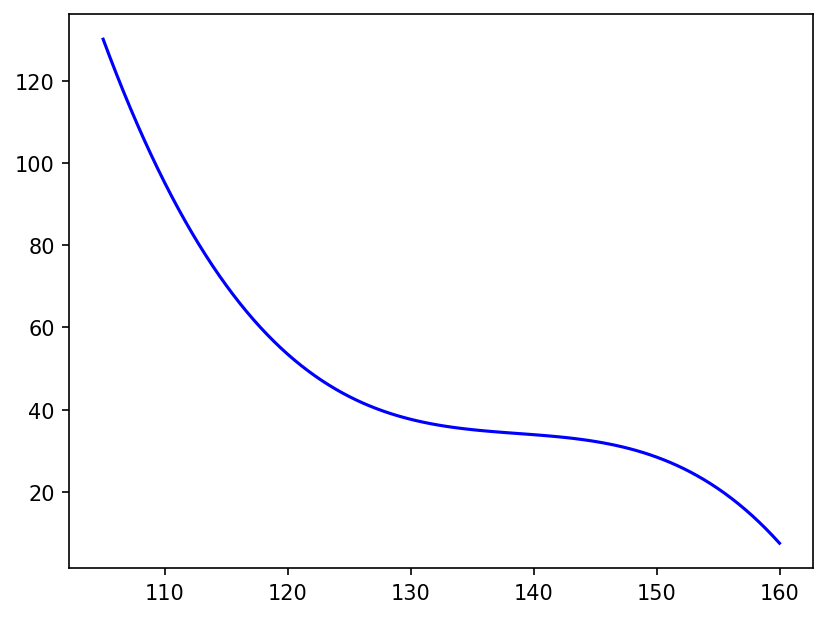

In [8]:
plt.figure()
xline = np.linspace(105,160,100)
yline_poly = polynomial_fit(xline, fit_params)
plt.plot(xline, yline_poly ,'b', label="3rd order polynomial fit")

In [9]:
ysub = occurances - polynomial_fit(myy, fit_params)
y = ysub 
x = myy

def f_G(x, B,x0,std):
    '''Gaussian function with offset A, amplitude B, mean x0 and standard deviation std.'''
    return  B*np.exp( -(x-x0)**2 / (2*std**2) )

param_guesses = [5, 125, 2]
popt, pcov = curve_fit(f_G, x, ysub, param_guesses) # fit function

err = np.sqrt(np.diag(pcov))

In [10]:
yline_G = f_G(xline, *popt) # calculate fitted line
yline_total = yline_G + yline_poly 

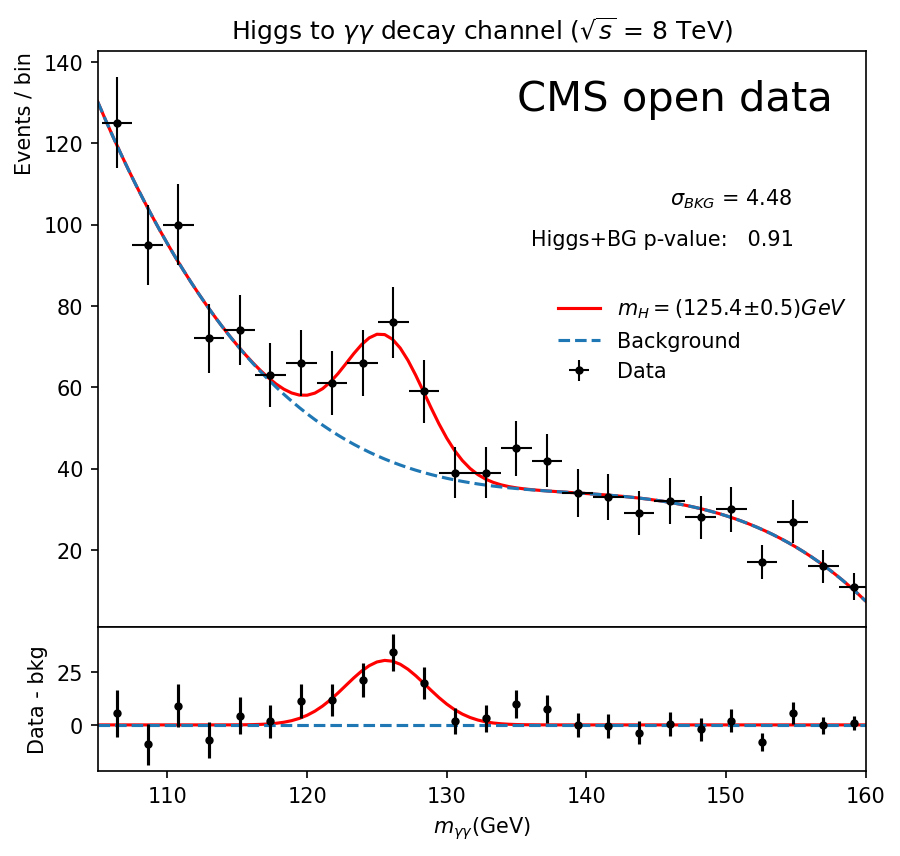

In [11]:
fig1 = plt.figure(1)

#125.39 ± 0.51


frame1 = fig1.add_axes((.1,.3,.8,.8))
# Plot points with error bars:
plt.title("Higgs to $\gamma \gamma$ decay channel ($\sqrt{s}$ = 8 TeV)")

plt.text(135,128,"CMS open data",fontsize=20)
plt.text(146,105,"$\sigma_{BKG}$ = 4.48")
plt.text(136,95,"Higgs+BG p-value:   0.91")

plt.plot(xline, yline_total,'r', label="$m_H = (125.4 ± 0.5) GeV$")
plt.plot(xline, yline_poly,'--', label="Background")
plt.errorbar(myy, occurances, yerr = np.sqrt(occurances), xerr = width/2, fmt=".k", linewidth=1, capsize=0, label="Data")

plt.legend(loc="center right")
plt.ylabel('Events / bin', loc = "top")
plt.xlim(105, 160)
plt.tick_params(axis='x', which='both', length=0, labelbottom=False, labelleft=False)



differences = occurances - polynomial_fit(myy, fit_params)
frame2 = fig1.add_axes((.1, .1, .8, .2))        

plt.plot(xline, yline_G, 'r', label="Gaussian fit")
plt.plot(xline, xline - xline, '--')
plt.errorbar(myy, differences, yerr = np.sqrt(occurances), fmt= ".k")

plt.xlabel('$m_{\gamma \gamma}$(GeV)')
plt.ylabel('Data - bkg')
plt.xlim(105, 160)

#plt.savefig('nice_graph.png', format='png', bbox_inches='tight') # save figure to current folder

plt.show()